In [6]:
using DSP, WAV
using Plots
using AbstractFFTs
using ChemometricsTools
using Shapefile
using Images, ImageMagick
using StatsBase
using Distances
using Statistics
using FFTW
using AbstractFFTs
using Distributions
using Random

┌ Info: Precompiling DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loading.jl:1278
┌ Info: Precompiling WAV [8149f6b0-98f6-5db9-b78f-408fbbb8ef88]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling ChemometricsTools [a9718f02-dbee-5ae5-ad0e-dfbd07fa387b]
└ @ Base loading.jl:1278
  ** incremental compilation may be fatally broken for this module **

┌ Info: Precompiling Shapefile [8e980c4a-a4fe-5da2-b3a7-4b4b0353a2f4]
└ @ Base loading.jl:1278
┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


In [1]:
relativePath_crowds = "./crowdSounds/"
fileWAVs_crowds = readdir(relativePath_crowds) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_crowds)

["00008047.wav", "00008098.wav", "07017020.wav", "07017033.wav", "07064037.wav", "07064052.wav", "07064058.wav", "07064059.wav", "07074149.wav"]


In [3]:
relativePath_crowds_test = "./crowdSoundsTest/"
fileWAVs_crowds_test = readdir(relativePath_crowds_test) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_crowds_test)

["07031051.wav", "07039089.wav"]


In [2]:
relativePath_mechanical = "./mechanicalSounds/"
fileWAVs_mechanical = readdir(relativePath_mechanical) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_mechanical)

["07007054.wav", "07011027.wav", "07011090.wav", "07066043.wav", "07070158.wav", "07070171.wav", "07071147.wav", "07075015.wav"]


In [4]:
relativePath_mechanical_test = "./mechanicalSoundsTest/"
fileWAVs_mechanical_test = readdir(relativePath_mechanical_test) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_mechanical_test)

["07027015.wav", "07039136.wav"]


In [8]:
crowd_signals = []
Fs_crowd = []
for filename in fileWAVs_crowds
    ss, Fs = wavread(relativePath_crowds*filename)
    push!(Fs_crowd,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(crowd_signals,ss[:,1])
end

In [9]:
crowd_signals_test = []
Fs_crowd_test = []
for filename in fileWAVs_crowds_test
    ss, Fs = wavread(relativePath_crowds_test*filename)
    push!(Fs_crowd_test,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(crowd_signals_test,ss[:,1])
end

In [11]:
mechanical_signals = []
Fs_mechanical = []
for filename in fileWAVs_mechanical
    ss, Fs = wavread(relativePath_mechanical*filename)
    push!(Fs_mechanical,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(mechanical_signals,ss[:,1])
end

In [12]:
mechanical_signals_test = []
Fs_mechanical_test = []
for filename in fileWAVs_mechanical_test
    ss, Fs = wavread(relativePath_mechanical_test*filename)
    push!(Fs_mechanical_test,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(mechanical_signals_test,ss[:,1])
end

In [13]:
print(Fs_mechanical_test)

Any[44100.0f0, 44100.0f0]

In [14]:
print(Fs_crowd_test)

Any[44100.0f0, 44100.0f0]

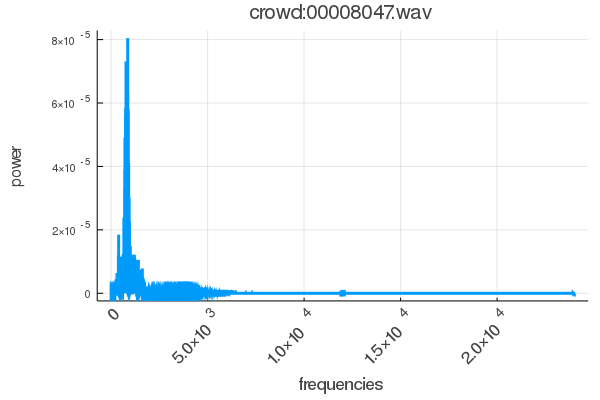

In [17]:
ss_ind = 1
prdgrm = DSP.Periodograms.periodogram(crowd_signals[ss_ind], fs=Int(Fs_crowd[ss_ind]), window=DSP.Windows.hamming)
p = plot(prdgrm.freq,prdgrm.power,legend=false,linewidth=3,xrotation=45,
        xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",title="crowd:"*fileWAVs_crowds[ss_ind])
display("image/png", p)

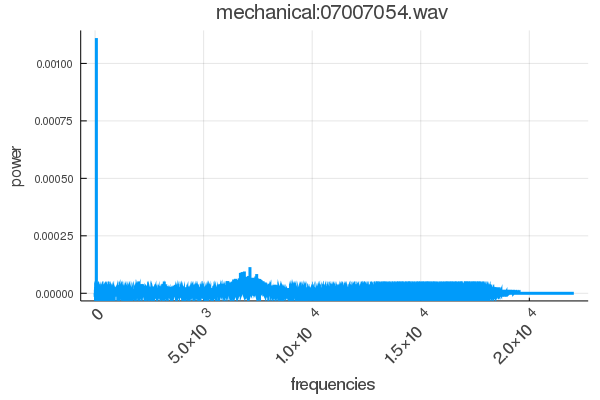

In [18]:
ss_ind = 1
prdgrm = DSP.Periodograms.periodogram(mechanical_signals[ss_ind], fs=Int(Fs_mechanical[ss_ind]), window=DSP.Windows.hamming)
p = plot(prdgrm.freq,prdgrm.power,legend=false,linewidth=3,xrotation=45,
        xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",title="mechanical:"*fileWAVs_mechanical[ss_ind])
display("image/png", p)